# 1. Read prices from CSV file

In [1]:
# Import the package pandas as pd
import pandas as pd

# Read the csv file using read_csv method of pandas
prices = pd.read_csv('security_prices_2000_2019.csv', index_col=0)

# Set the index to datetime
prices.index = pd.to_datetime(prices.index)

prices.tail()

,Gold,Silver,Crude Oil,Platinum,Corn,Sugar,Wheat,EUR-USD,USD-JPY,GBP-USD,...,GBP-EUR,S&P500,Dow Jones Industrial Average,NASDAQ,Russell 2000,TLT,TLH,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-26,142.380005,16.73,103.120003,89.510002,14.84,7.01,5.76,1.109545,109.369003,1.297353,...,1.16890,321.052124,283.575867,213.335373,166.037979,136.366409,143.870224,110.003388,125.000992,84.119888
2019-12-27,142.330002,16.58,103.279999,88.879997,14.88,7.05,5.82,1.110112,109.542000,1.300221,...,1.17085,320.972565,283.843536,213.155762,165.221146,136.515533,144.009445,110.162628,125.219879,84.179588
2019-12-30,142.630005,16.74,103.120003,90.129997,14.82,7.08,5.80,1.118230,109.428001,1.309192,...,1.17066,319.202972,282.059174,211.758743,164.802765,136.018463,143.691238,110.092964,125.249718,84.209435
2019-12-31,142.899994,16.68,102.480003,90.930000,14.80,7.02,5.85,1.120230,108.873001,1.311303,...,1.17039,319.978424,282.624176,212.157883,165.031876,134.686310,142.816101,109.694862,125.110435,84.199486
2020-01-01,142.899994,16.68,102.480003,90.930000,14.80,7.02,5.85,1.122083,108.681000,1.326260,...,1.18140,319.978424,282.624176,212.157883,165.031876,134.686310,142.816101,109.694862,125.110435,84.199486


# 2. Calculate Hurst exponent

In [2]:
def get_hurst(series):
    # Calculate Hurst exponent
    hurst_value = compute_Hc(series.dropna(), kind='price')[0]
    return hurst_value


def hurst_plot(hurst_plot_graph, title_name):
    plt.subplots(figsize=(10, 7))

    # Plot hurst exponent
    hurst_plot_graph = ['grey' if (x < 0.65) else 'green' for x in hurst.values]
    seaborn.barplot(x=hurst.index, y=hurst.values, palette=hurst_plot_graph)

    # Set style for the bar graph
    plt.axhline(0.65, color="red")
    plt.title(title_name, fontsize=14)
    plt.ylabel('Hurst Values', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

### Store securities according to their classes

In [3]:
commodities = ['Gold', 'Silver', 'Crude Oil','Platinum', 'Corn', 'Sugar', 'Wheat']

currencies = ['EUR-USD', 'USD-JPY', 'GBP-USD', 'USD-CAD', 'USD-CHF', 'GBP-EUR']

stock_indices = ['S&P500', 'Dow Jones Industrial Average','NASDAQ', 'Russell 2000']

treasuries = ['TLT', 'TLH', 'IEF', 'IEI', 'SHY']

# 2.1 Commodities

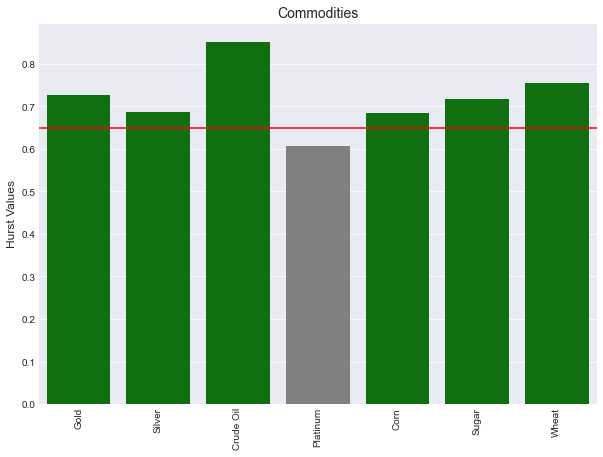

In [4]:
# Import compute_Hc from hurst library
from hurst import compute_Hc

# Import matplotlib and set the style
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Get Hurst exponenet of commodities
hurst = prices[commodities].apply(get_hurst)

# Plot Hurst exponent values
hurst_plot(hurst.sort_values(0), 'Commodities')

# 2.2 Stock indices

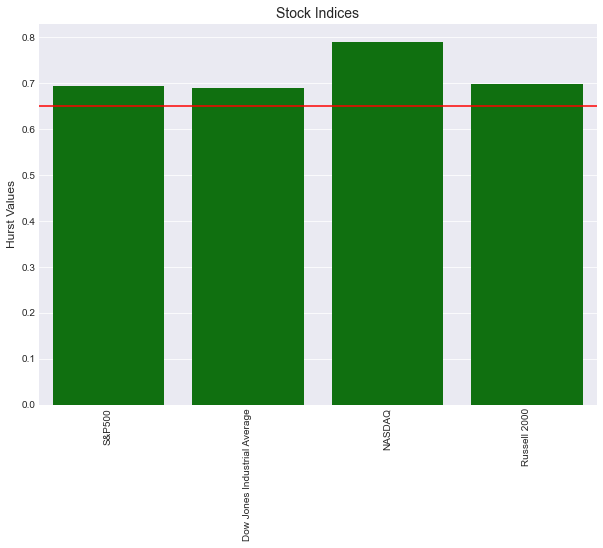

In [6]:
# Get Hurst exponent of stock indices
hurst = prices[stock_indices].apply(get_hurst)
hurst_plot(hurst.sort_values(0), 'Stock Indices')

# 2.3 Currencies

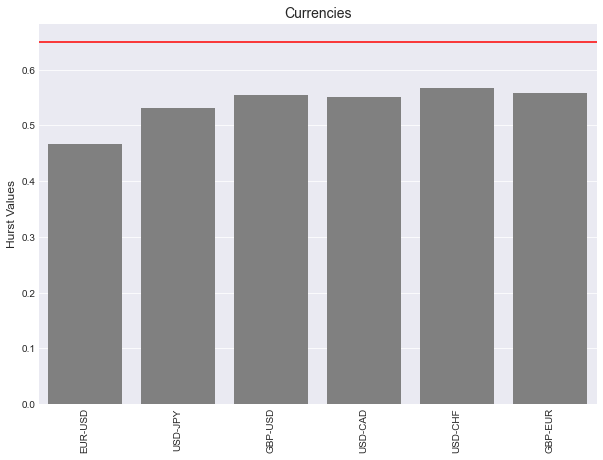

In [7]:
# Get Hurst exponent of currencies
hurst = prices[currencies].apply(get_hurst)
hurst_plot(hurst.sort_values(0), 'Currencies')

# 2.4 Treasuries

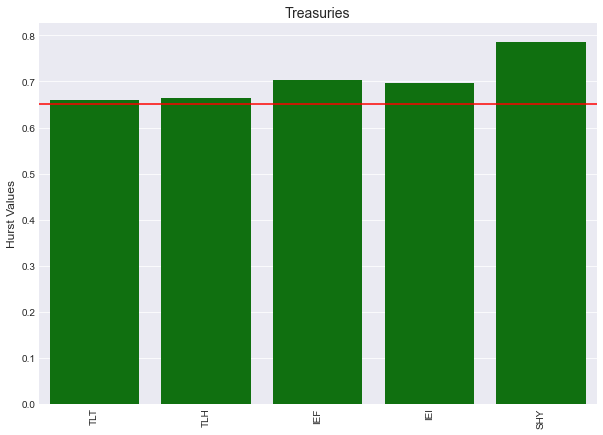

In [8]:
hurst = prices[treasuries].apply(get_hurst)
hurst_plot(hurst.sort_values(0),'Treasuries')

# 3. Filter securities with high Hurst exponent

In [9]:
data = prices[:]

# Calculate Hurst exponent of all securities
hurst = data.apply(get_hurst)

# Store Hurst exponent in a dataframe
hurst = pd.DataFrame(hurst, columns=['hurst_exponent'])

# Keep only those securities having Hurst value greater than 0.65
filtered_hurst = hurst.loc[hurst['hurst_exponent'] > 0.65].sort_values(
    by='hurst_exponent', ascending=False)

print(filtered_hurst)

                              hurst_exponent
Crude Oil                           0.852324
NASDAQ                              0.789579
SHY                                 0.786669
Wheat                               0.754997
Gold                                0.726369
Sugar                               0.717827
IEF                                 0.702417
Russell 2000                        0.698042
IEI                                 0.696294
S&P500                              0.694677
Dow Jones Industrial Average        0.690858
Silver                              0.687496
Corn                                0.683932
TLH                                 0.664223
TLT                                 0.658736
